In [1]:
import pandas as pd

df_test_pre = pd.read_csv('test.csv', index_col="Id")

df_train = pd.read_csv('train.csv', index_col="Id")
#check the decoration
print(df_train.columns)

#descriptive statistics summary
print(df_train['SalePrice'].describe())


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [2]:
#missing data
print('\n')
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)



               Total   Percent
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
FireplaceQu      690  0.472603
LotFrontage      259  0.177397
GarageType        81  0.055479
GarageCond        81  0.055479
GarageFinish      81  0.055479
GarageQual        81  0.055479
GarageYrBlt       81  0.055479
BsmtFinType2      38  0.026027
BsmtExposure      38  0.026027
BsmtQual          37  0.025342
BsmtCond          37  0.025342
BsmtFinType1      37  0.025342
MasVnrArea         8  0.005479
MasVnrType         8  0.005479
Electrical         1  0.000685
RoofMatl           0  0.000000
Exterior1st        0  0.000000
RoofStyle          0  0.000000
ExterQual          0  0.000000
Exterior2nd        0  0.000000
YearBuilt          0  0.000000
ExterCond          0  0.000000
Foundation         0  0.000000
YearRemodAdd       0  0.000000
SalePrice          0  0.000000
OverallCond        0  0.000000
...              ...       ...
Garage

In [3]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
print(df_train.isnull().sum().max()) #just checking that there's no missing data missing...

0


In [4]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [5]:
# Separando ariaveis de dependes de independentes

Y = pd.DataFrame(df_train['SalePrice'])
X = df_train.drop('SalePrice', axis=1)

In [6]:
Y.head(10)

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
6,143000
7,307000
8,200000
9,129900


In [7]:
X.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,30,0,320,0,0,700,10,2009,WD,Normal
7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,57,0,0,0,0,0,8,2007,WD,Normal
8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,204,228,0,0,0,350,11,2009,WD,Normal
9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,205,0,0,0,0,4,2008,WD,Abnorml


In [8]:
colunas_nao_numericas = X.select_dtypes(exclude=["number"]).columns

for col in colunas_nao_numericas:
    X[col] = X[col].astype('category')

In [9]:
X.dtypes

X[colunas_nao_numericas] = X[colunas_nao_numericas].apply(lambda x: x.cat.codes)

In [10]:
X.dtypes

MSSubClass       int64
MSZoning          int8
LotArea          int64
Street            int8
LotShape          int8
LandContour       int8
Utilities         int8
LotConfig         int8
LandSlope         int8
Neighborhood      int8
Condition1        int8
Condition2        int8
BldgType          int8
HouseStyle        int8
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle         int8
RoofMatl          int8
Exterior1st       int8
Exterior2nd       int8
ExterQual         int8
ExterCond         int8
Foundation        int8
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
Heating           int8
                 ...  
CentralAir        int8
Electrical        int8
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual

In [11]:
#Univariate Selection

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
2        LotArea  1.011442e+07
56       MiscVal  6.249006e+06
34      2ndFlrSF  4.649813e+05
25    BsmtFinSF1  3.994498e+05
55      PoolArea  3.832987e+05
26    BsmtFinSF2  3.685835e+05
27     BsmtUnfSF  2.747139e+05
35  LowQualFinSF  2.447074e+05
36     GrLivArea  1.968564e+05
28   TotalBsmtSF  1.744388e+05


In [39]:
#histogram and normal probability plot
import seaborn as sns
from scipy.stats import norm
from scipy import stats

def plot_dist(var):
    sns.distplot(var, fit=norm)
    fig = plt.figure()
    res = stats.probplot(var, plot=plt)

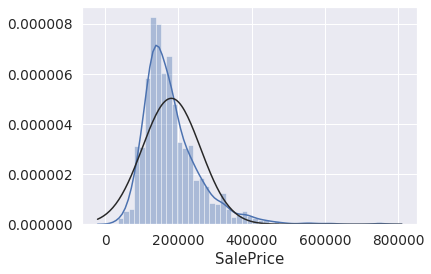

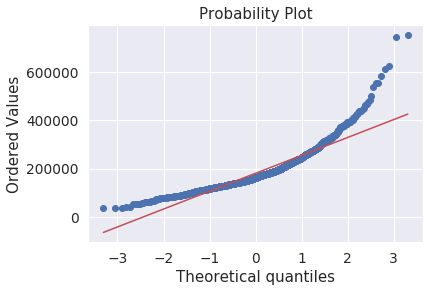

In [40]:
plot_dist(Y['SalePrice'])
Y['SalePrice'] = np.log(Y['SalePrice'])

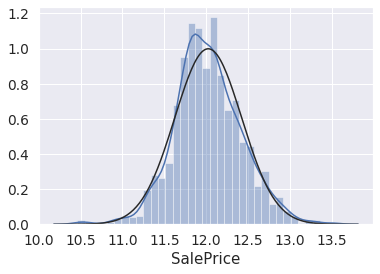

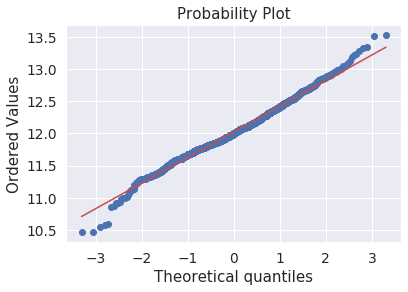

In [41]:
plot_dist(Y['SalePrice'])

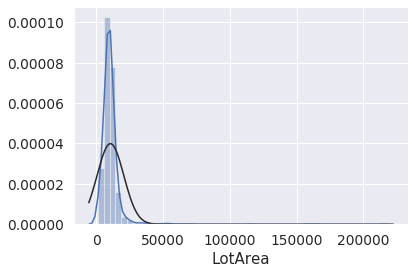

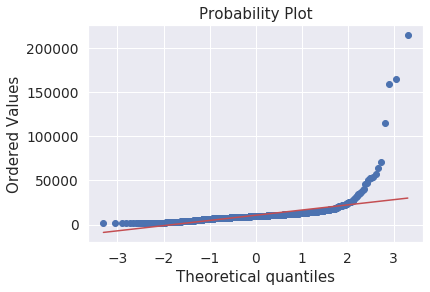

In [42]:
plot_dist(X['LotArea'])

/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[1.74200996e-02 1.05620327e-02 3.83564358e-02 8.38164177e-04
 1.52819482e-02 8.39120911e-03 6.88059225e-05 1.91668606e-02
 5.70084755e-03 2.87805907e-02 1.13791677e-02 1.17212304e-03
 6.95790812e-03 1.60183501e-02 2.54089061e-02 2.00569728e-02
 3.09500250e-02 3.61530060e-02 1.50903016e-02 1.54509905e-03
 2.24025514e-02 2.37416696e-02 8.39082424e-03 1.18027601e-02
 1.52421927e-02 3.19973231e-02 8.62861932e-03 3.64435812e-02
 3.47497651e-02 1.58171782e-03 1.84404462e-02 3.71184829e-03
 7.71538193e-03 3.84027304e-02 2.08185570e-02 1.70278831e-03
 3.70040755e-02 1.75974522e-02 4.80857612e-03 1.19115769e-02
 1.32289851e-02 2.03737859e-02 2.76912973e-03 1.55858458e-02
 2.61231262e-02 5.67429930e-03 1.84919239e-02 1.47030719e-02
 3.47798125e-02 6.06348988e-03 2.51911656e-02 2.98653128e-02
 1.07078694e-02 2.31499377e-03 8.63299832e-03 2.79383617e-04
 4.09550463e-03 3.64147118e-02 3.33450545e-02 1.09384016e-02
 1.40278422e-02]


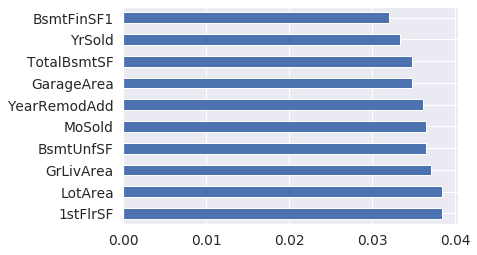

In [28]:
#Feature importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

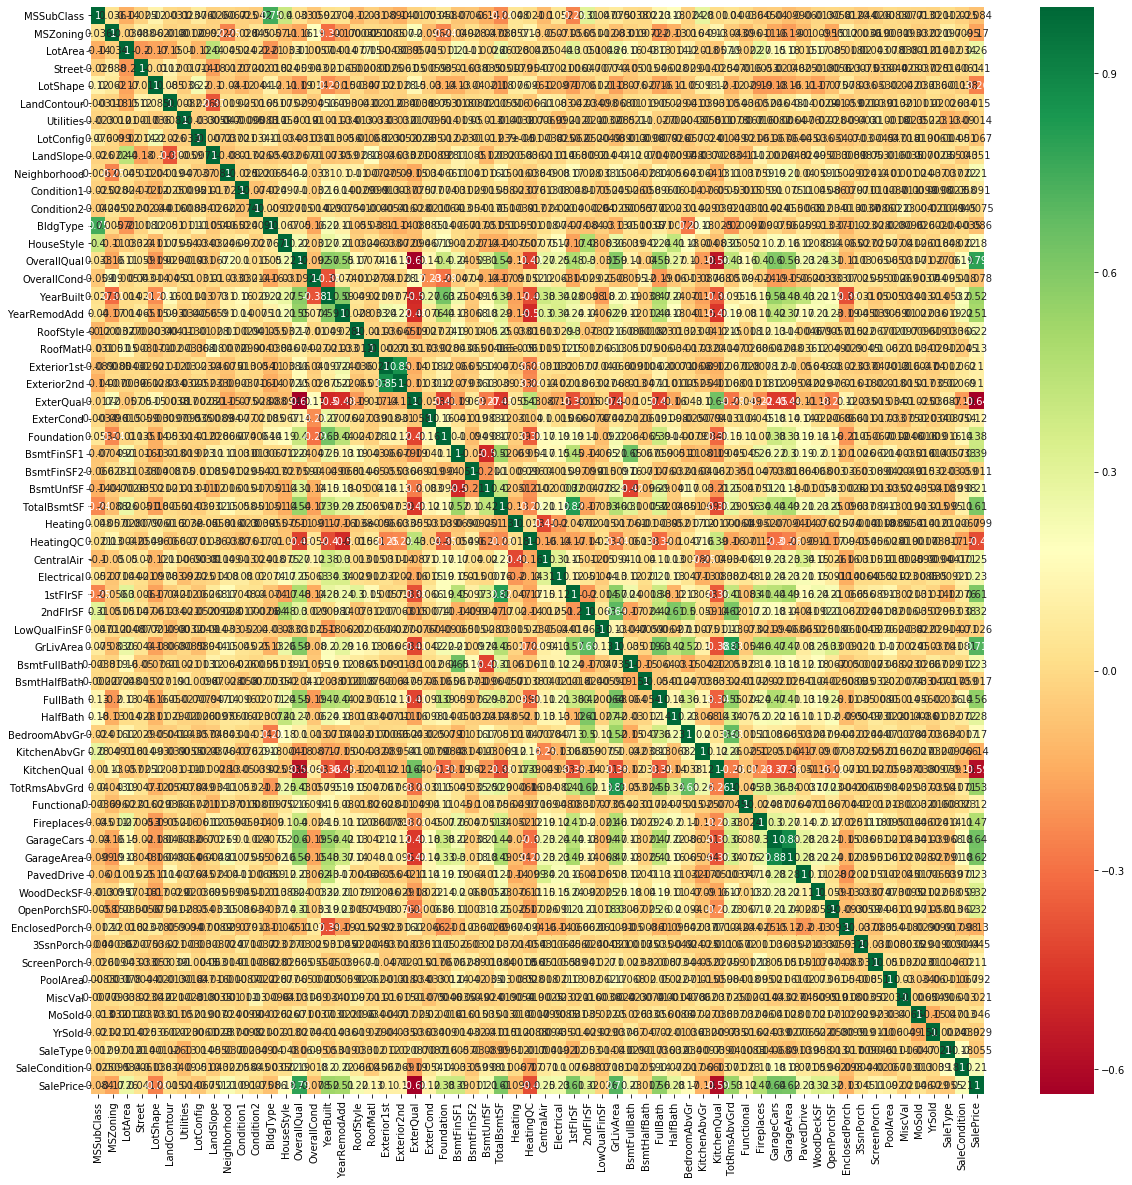

In [13]:
# Seleccao por correlacao

data = X.copy()
data['SalePrice'] = Y

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

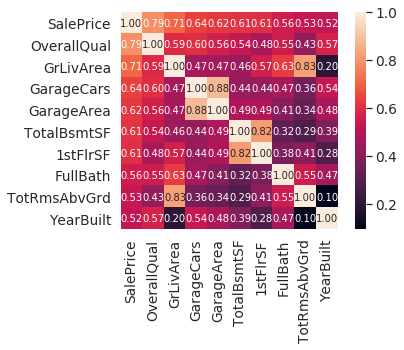

In [14]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
X.head(10)


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
2,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,0,5,2007,8,4
3,60,3,11250,1,0,3,0,4,0,5,...,42,0,0,0,0,0,9,2008,8,4
4,70,3,9550,1,0,3,0,0,0,6,...,35,272,0,0,0,0,2,2006,8,0
5,60,3,14260,1,0,3,0,2,0,15,...,84,0,0,0,0,0,12,2008,8,4
6,50,3,14115,1,0,3,0,4,0,11,...,30,0,320,0,0,700,10,2009,8,4
7,20,3,10084,1,3,3,0,4,0,21,...,57,0,0,0,0,0,8,2007,8,4
8,60,3,10382,1,0,3,0,0,0,14,...,204,228,0,0,0,350,11,2009,8,4
9,50,4,6120,1,3,3,0,4,0,17,...,0,205,0,0,0,0,4,2008,8,0


In [16]:
Y.head(10)

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
6,143000
7,307000
8,200000
9,129900


In [17]:
#Boruta

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)

y = Y.values.ravel()
x = X.values
features = boruta_selector.fit(x, y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	56


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	56


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	56


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	56


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	57


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	57


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	57


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	57


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58
Iteration: 	99 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	58


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	58


/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


In [29]:
boruta_selector.support_

# check ranking of features
boruta_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = boruta_selector.transform(x)

In [31]:
rank = 0
for indx in boruta_selector.ranking_:
    rank+=1
    print(str(rank) + " - " + str(X.columns[indx]) + " " + str(indx) )

1 - BsmtHalfBath 38
2 - ExterQual 22
3 - LandContour 5
4 - Fireplaces 46
5 - GarageCars 47
6 - EnclosedPorch 52
7 - SaleCondition 60
8 - WoodDeckSF 50
9 - GarageArea 48
10 - Condition2 11
11 - BedroomAbvGr 41
12 - BsmtUnfSF 27
13 - EnclosedPorch 52
14 - KitchenAbvGr 42
15 - Condition1 10
16 - RoofStyle 18
17 - Street 3
18 - Condition2 11
19 - KitchenQual 43
20 - PoolArea 55
21 - Foundation 24
22 - Heating 29
23 - 1stFlrSF 33
24 - EnclosedPorch 52
25 - TotalBsmtSF 28
26 - LotConfig 7
27 - OverallQual 14
28 - LotArea 2
29 - LotShape 4
30 - RoofStyle 18
31 - ScreenPorch 54
32 - YrSold 58
33 - MiscVal 56
34 - MSZoning 1
35 - Utilities 6
36 - 2ndFlrSF 34
37 - MSZoning 1
38 - LowQualFinSF 35
39 - HalfBath 40
40 - Exterior2nd 21
41 - HeatingQC 30
42 - OverallCond 15
43 - SaleType 59
44 - GrLivArea 36
45 - HouseStyle 13
46 - TotRmsAbvGrd 44
47 - Electrical 32
48 - BsmtFinSF2 26
49 - LandSlope 8
50 - MoSold 57
51 - Neighborhood 9
52 - YearBuilt 16
53 - YearRemodAdd 17
54 - TotRmsAbvGrd 44
55 - 

In [20]:
boruta_selector.support_


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [21]:
print(X_filtered.shape)

(1459, 2)


In [22]:
#Recursive Feature Elimination
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
x = X.values
y = Y.values
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(x, y)
print("Num Features: " + fit.n_features_)
print("Selected Features: " + fit.support_)
print("Feature Ranking: " + fit.ranking_)

/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number o

/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/marcos/Documentos/f

/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", F

/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/Documentos/featre selection/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", F

Num Features: %d


TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

In [25]:
print("Num Features: " + str(fit.n_features_))
print("Selected Features: " + str(fit.support_))
print("Feature Ranking: " + str(fit.ranking_))

Num Features: 10
Selected Features: [False  True False False  True False False False False False False False
 False False  True  True False False  True False False False False False
 False False False False False False  True False False False False False
 False  True False False False False False  True  True False  True False
 False False False False False False False False False False False False
 False]
Feature Ranking: [32  1 52 47  1 13 51 12 18 21  6 33 10  2  1  1 27 26  1 29 24 23  3 11
  4 37 40 39 46 31  1 28 16 38 42 49 41  1 22  7  9  8 30  1  1 19  1  5
 44 17 36 34 35 48 43 45 50 14 25 20 15]


In [27]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(x)
# summarize components
print("Explained Variance: " + str(fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance: [9.85122160e-01 4.88188967e-03 3.38722897e-03 2.77497668e-03
 2.41544912e-03 4.96749952e-04 3.06242407e-04 2.95475577e-04
 1.38869029e-04 4.11353855e-05]
[[-5.92564019e-04 -2.19061739e-06  9.99704577e-01 -1.26262136e-06
  -2.33671468e-05 -1.05644770e-05  2.64717892e-08 -1.96966464e-05
   1.20831334e-05  2.70888008e-05  2.08228921e-06  5.76918033e-07
  -2.46981972e-05 -6.30819382e-06  1.47946643e-05 -6.56882962e-07
   4.50978356e-05  2.97981174e-05  6.47819839e-06  8.99903058e-06
   1.39359990e-06 -1.35910785e-06 -4.03451363e-06  1.12245436e-06
  -7.67754127e-07  9.82207333e-03  1.79634453e-03 -1.03067634e-04
   1.15153502e-02  8.27588928e-07  6.62217215e-07  1.23754888e-06
   4.65151817e-06  1.16450172e-02  2.24583143e-03  2.34538302e-05
   1.39143025e-02  8.24332936e-06  1.14830028e-06  7.00215861e-06
   7.36508254e-07  9.81312351e-06 -3.91738101e-07 -4.80348247e-06
   3.10888871e-05 -2.18964783e-06  1.75635750e-05  1.16578926e-05
   3.88289952e-03  7.70234057e-07 